**ESCUELA DE INGENIERÍA MECATRÓNICA**

## `PROCESAMIENTO DIGITAL DE SEÑALES E IMÁGENES`

### `Docente: Ms. Ing. Emerson Maximo Asto Rodriguez`

```
Práctica 7: Filtrado en la frecuencia
```

**INTEGRANTES:**

1. 
2. 
3. 
4. 

### 1. Implemente un algoritmo que permita realizar la traslación de coordenadas de una imagen
* Se debe ampliar previamente la imagen con 0'spara poder implementarlo

* Realizar el padding usando la función:

`np.pad(img,((100,100),(100,100)),'constant',constant_values=((0, 0),(0,0)))`

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

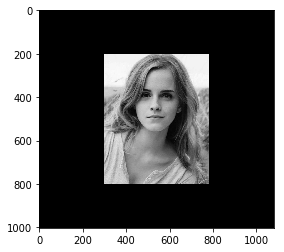

In [ ]:
img = cv2.imread('lab_images/emma.jpg', 0)
img_padded = np.pad(img,((200,200),(300,300)),'constant',constant_values=((0, 0),(0,0)))

plt.imshow(img_padded, cmap='gray')
plt.show()

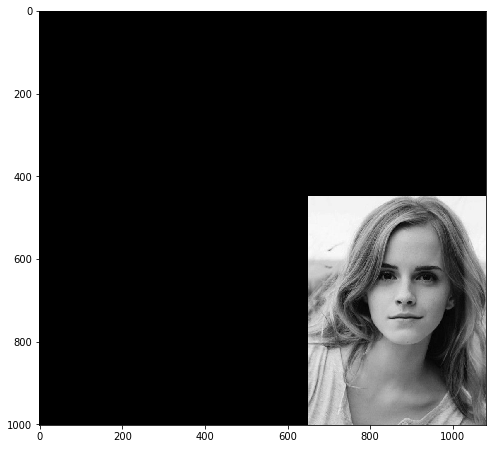

In [ ]:
tx, ty = (250, 350)

fil, col = img_padded.shape
img_traslated = np.zeros_like(img_padded)

for i in range(fil):
    for j in range(col):
        if (i + tx < fil) and (j + ty < col):
            img_traslated[i+tx, j+ty] = img_padded[i, j]

plt.figure(figsize=(8,8))
plt.imshow(img_traslated, cmap='gray')
plt.show()

### 2. Implemente una  algoritmo básico que permita realizar una máscara que tenga un circulo blanco en un fondo negro
* El circulo debe estar centrado
* Use la Funcion `row,col=np.ogrid[0:r,0:c]` para simplificar su realización

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


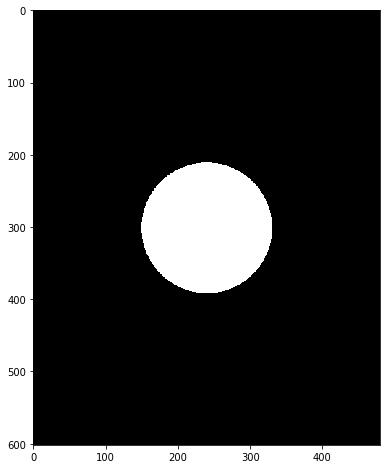

In [ ]:
img = cv2.imread('lab_images/emma.jpg', 0)

fil, col = img.shape

H = np.zeros_like(img)
f, c = np.ogrid[0:fil,0:col]

H = ((f-fil/2)**2 + (c-col/2)**2) <=  (0.15*fil)**2

H = np.int32(H)
print(H)

plt.figure(figsize=(8,8))
plt.imshow(H, cmap='gray')
plt.show()

```
1. Qué hace la función np.ogrid?

2. Como haría que el circulo este centrado en las coordenadas 0,0?

3. Evalúe el efecto de la función np.fft.fftshift y np.fft.ifftshift

```

### 3. Implemente una  algoritmo basico que permita realizar una máscara con un circulo central blanco difuminado usando una distribucion butterwoth

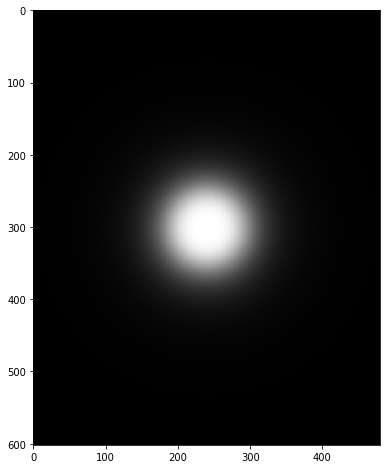

In [ ]:
img = cv2.imread('lab_images/emma.jpg', 0)
fil, col = img.shape

f, c = np.ogrid[0:fil,0:col]
n = 2

D0 = 0.1*fil
D =  np.sqrt( (f-fil/2)**2 + (c-col/2)**2 )

H = 1/(1 + (D/D0)**(2*n))

plt.figure(figsize=(8,8))
plt.imshow(H, cmap='gray')
plt.show()

```
1. Que efecto tiene la variable n en la distribución?
```

### 4. Implemente una  algoritmo basico que permita realizar una máscara con un circulo central blanco difuminado usando una distribucion Gaussiana

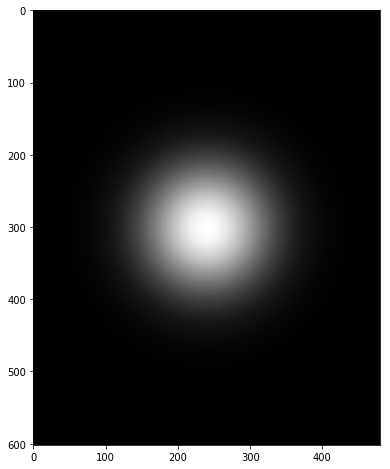

In [ ]:
img = cv2.imread('lab_images/emma.jpg', 0)
fil, col = img.shape

f, c = np.ogrid[0:fil,0:col]
n = 2

D0 = 0.1*fil
D =  np.sqrt( (f-fil/2)**2 + (c-col/2)**2 )

H = np.exp(-(D**2)/(2*(D0**2)))

plt.figure(figsize=(8,8))
plt.imshow(H, cmap='gray')
plt.show()

```
1. Como se controla el tamaño de la figura?
2. Es posible cambiar el difuminado como en el filtro butterworth?
```

### 5. Muestre el espectro de frecuencia de una imagen, luego seccione un rectangulo del espectro y regrese al dominio del tiempo, muestre el resultado sobre la imagen


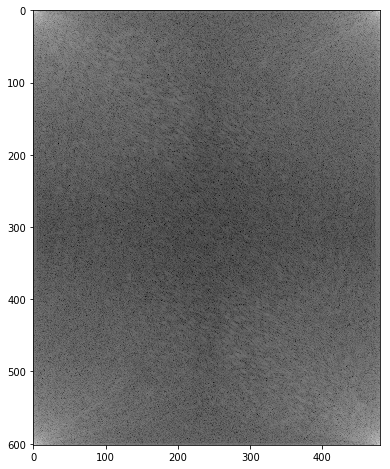

In [ ]:
img = cv2.imread('lab_images/emma.jpg', 0)

img_fft = np.fft.fft2(img)
espectro = np.log(1 + np.abs(img_fft))

plt.figure(figsize=(8,8))
plt.imshow(espectro, cmap='gray')
plt.show()

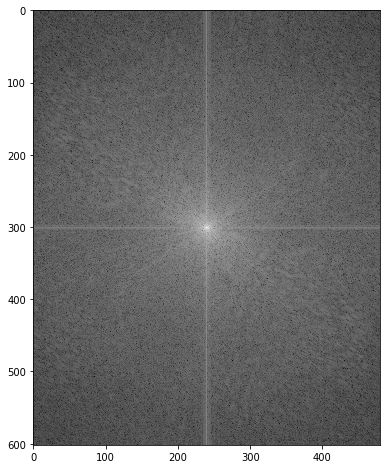

In [ ]:
img_fft_shift = np.fft.fftshift(img_fft)
espectro = np.log(1 + np.abs(img_fft_shift))

plt.figure(figsize=(8,8))
plt.imshow(espectro, cmap='gray')
plt.show()

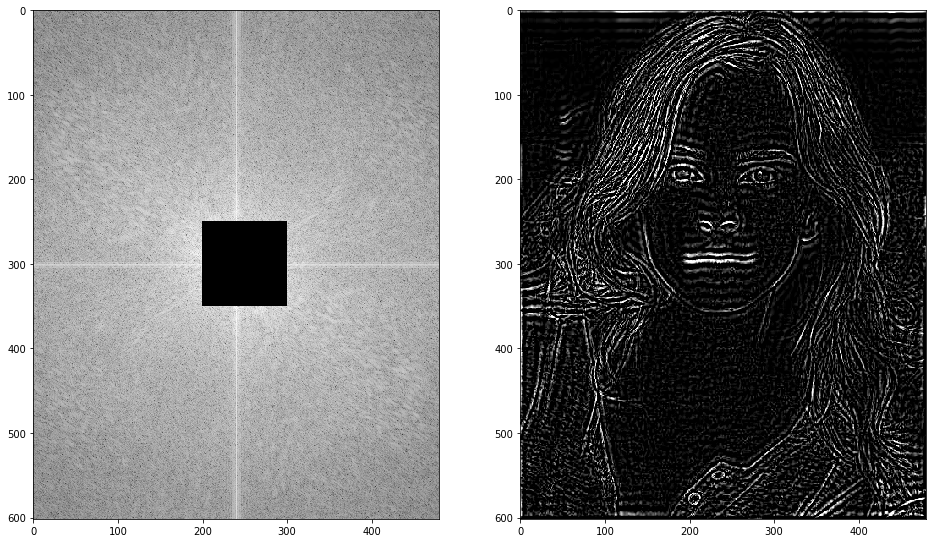

In [ ]:
img_fft_shift[250:350, 200:300] = 0
espectro = np.log(1 + np.abs(img_fft_shift))

img_fft = np.fft.ifftshift(img_fft_shift)

img_ifft = np.fft.ifft2(img_fft)
img_ifft_real = np.real(img_ifft)


plt.subplots(1,2,figsize=(16,16))
plt.subplot(121)
plt.imshow(espectro, cmap='gray')
plt.subplot(122)
plt.imshow(img_ifft_real*10, cmap='gray', vmin=0, vmax=255)
plt.show()

```
1. Cual fue el efecto de eliminar el cuadrado en el espectro de frecuencias?

2. Verifique que es lo que sucede si elimina todo el espectro excepto el cuadrado central

3. A que cree que se debe el efecto de distorsión (efecto eco)?
```

### 6. Implemente los filtros frecuenciales pasa-bajos
* El padding debe ser el doble de la dimension de la imagen original

#### 6.1. Filtro ideal

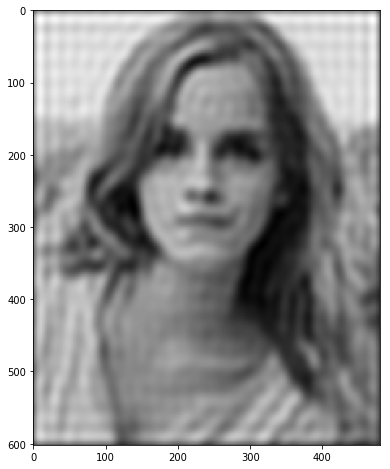

In [ ]:
img = cv2.imread('lab_images/emma.jpg', 0)
fil, col = img.shape

img_padded = np.pad(img,((0,fil),(0,col)),'constant',constant_values=((0, 0),(0,0)))

f, c = np.ogrid[0:2*fil,0:2*col]

H = ((f-fil)**2 + (c-col)**2) <=  (0.08*fil)**2
H_pb_ideal = np.int32(H)

img_fft = np.fft.fft2(img_padded)
img_fft_shift = np.fft.fftshift(img_fft)

G_fft = img_fft_shift * H_pb_ideal

G_fft_ishift = np.fft.ifftshift(G_fft)
g = np.fft.ifft2(G_fft_ishift)
g_real = np.real(g)[0:fil, 0:col]

plt.figure(figsize=(8,8))
plt.imshow(g_real, cmap='gray')
plt.show()

```
Cree el algoritmo para mostrar la aplicación del filtro ideal mostrado en la siguiente figura
```

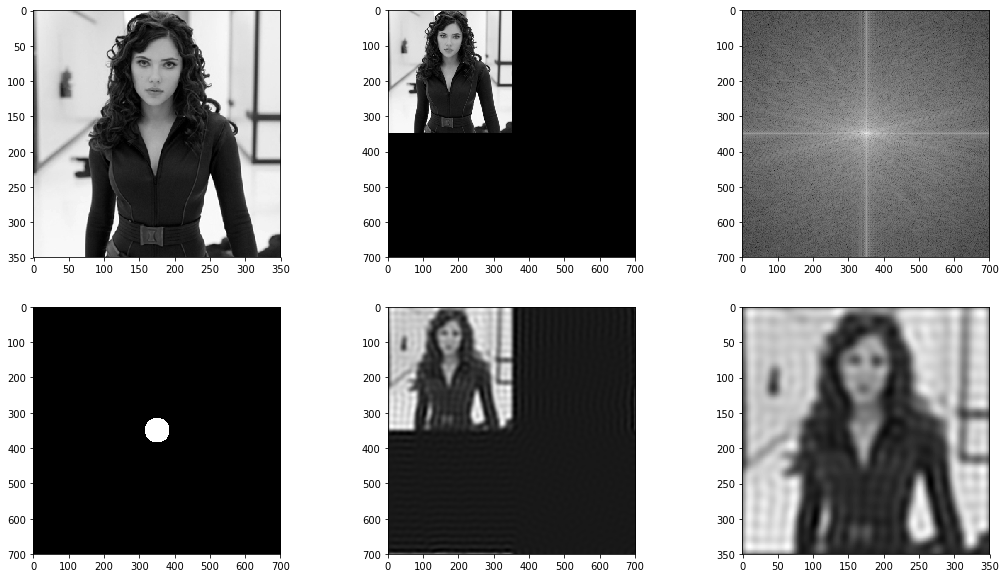

In [ ]:
#PASA BAJOS IDEAL


#### 6.2. Filtro Butterworth

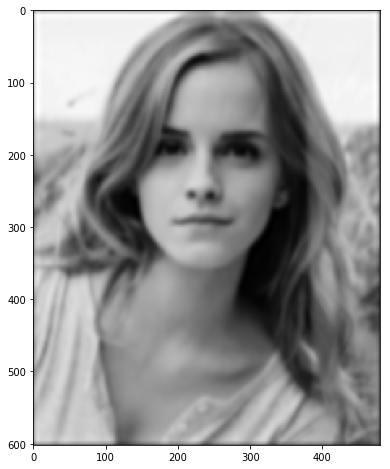

In [ ]:
img = cv2.imread('lab_images/emma.jpg', 0)
fil, col = img.shape

img_padded = np.pad(img,((0,fil),(0,col)),'constant',constant_values=((0, 0),(0,0)))

f, c = np.ogrid[0:2*fil,0:2*col]

n = 2
D =  np.sqrt( (f-fil)**2 + (c-col)**2 )
D0 = (0.12*fil)
H_pb_butter = 1/(1 + (D/D0)**(2*n))

img_fft = np.fft.fft2(img_padded)
img_fft_shift = np.fft.fftshift(img_fft)

G_fft = img_fft_shift * H_pb_butter

G_fft_ishift = np.fft.ifftshift(G_fft)
g = np.fft.ifft2(G_fft_ishift)
g_real = np.real(g)[0:fil, 0:col]

plt.figure(figsize=(8,8))
plt.imshow(g_real, cmap='gray')
plt.show()

```
Cree el algoritmo para mostrar la figura mostrada a continuación
```

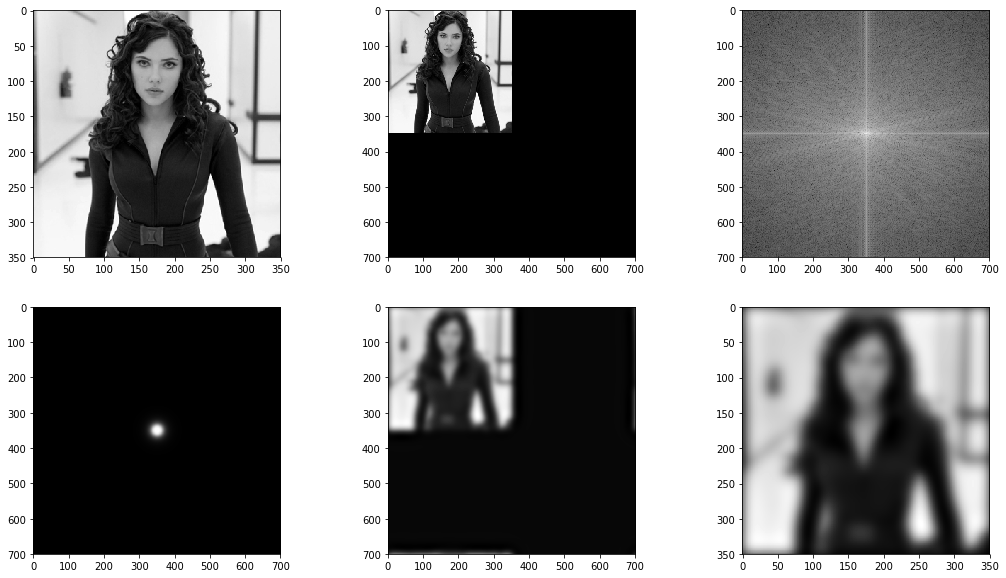

In [ ]:
#PASA BAJOS BUTTERWORTH


#### 6.3. Filtro gaussiano

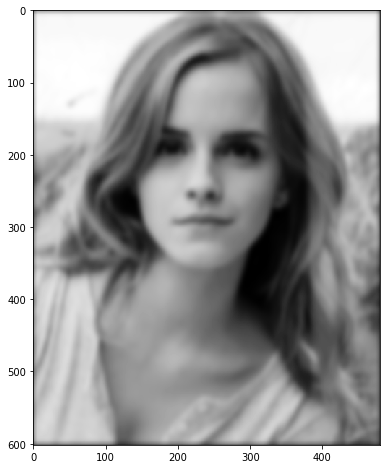

In [ ]:
img = cv2.imread('lab_images/emma.jpg', 0)
fil, col = img.shape

img_padded = np.pad(img,((0,fil),(0,col)),'constant',constant_values=((0, 0),(0,0)))

f, c = np.ogrid[0:2*fil,0:2*col]

D =  np.sqrt( (f-fil)**2 + (c-col)**2 )
D0 = (0.08*fil)
H_pb_gauss = np.exp(-(D**2)/(2*(D0**2)))

img_fft = np.fft.fft2(img_padded)
img_fft_shift = np.fft.fftshift(img_fft)

G_fft = img_fft_shift * H_pb_gauss

G_fft_ishift = np.fft.ifftshift(G_fft)
g = np.fft.ifft2(G_fft_ishift)
g_real = np.real(g)[0:fil, 0:col]

plt.figure(figsize=(8,8))
plt.imshow(g_real, cmap='gray')
plt.show()

```
Cree el algoritmo para mostrar en la misma figura el proceso de la aplicación del filtro Butterworth
```

### 7. Implemente los filtros frecuenciales pasa-altos

#### 7.1. Filtro ideal pasaalto

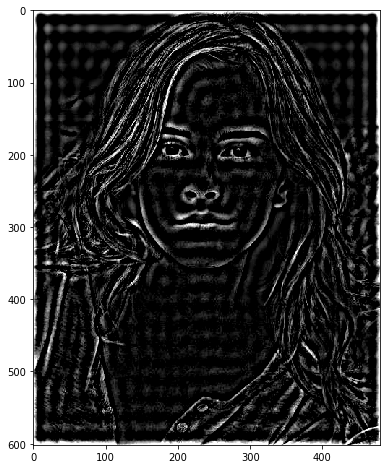

In [ ]:
img = cv2.imread('lab_images/emma.jpg', 0)
fil, col = img.shape

img_padded = np.pad(img,((0,fil),(0,col)),'constant',constant_values=((0, 0),(0,0)))

f, c = np.ogrid[0:2*fil,0:2*col]

H = ((f-fil)**2 + (c-col)**2) <=  (0.08*fil)**2
H_pa_ideal = 1 - np.int32(H)

img_fft = np.fft.fft2(img_padded)
img_fft_shift = np.fft.fftshift(img_fft)

G_fft = img_fft_shift * H_pa_ideal

G_fft_ishift = np.fft.ifftshift(G_fft)
g = np.fft.ifft2(G_fft_ishift)
g_real = np.real(g)[0:fil, 0:col]

plt.figure(figsize=(8,8))
plt.imshow(g_real*5, cmap='gray', vmin=0, vmax=255)
plt.show()

```
Cree el algoritmo para mostrar en la misma figura el proceso de la aplicación del filtro Butterworth
```

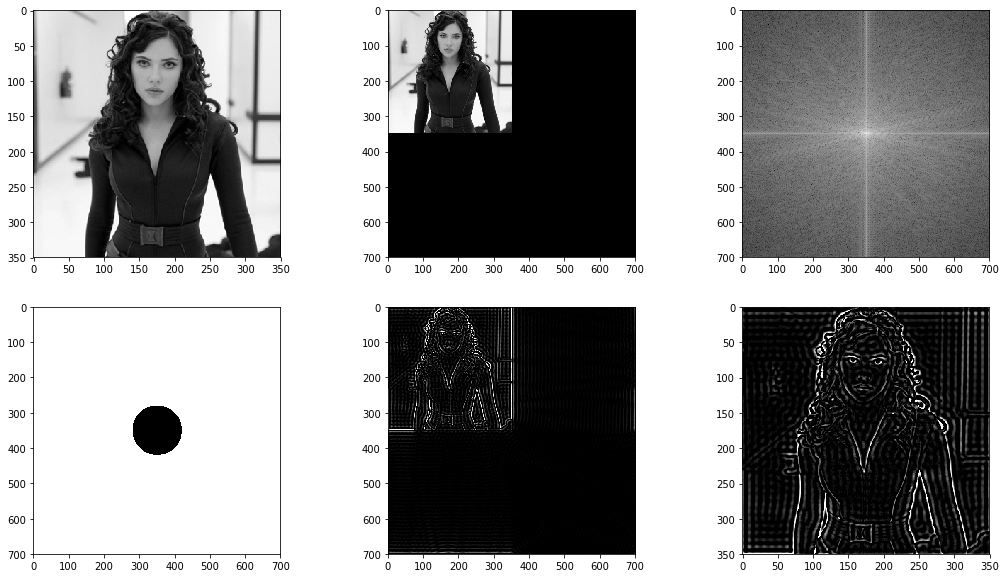

In [ ]:
#PASA ALTOS IDEAL


#### 7.2. Filtro pasalto butterworth

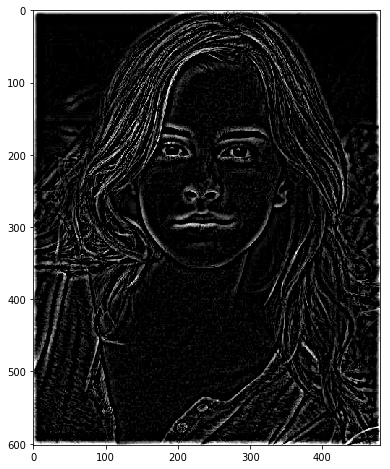

In [ ]:
img = cv2.imread('lab_images/emma.jpg', 0)
fil, col = img.shape

img_padded = np.pad(img,((0,fil),(0,col)),'constant',constant_values=((0, 0),(0,0)))

f, c = np.ogrid[0:2*fil,0:2*col]

n = 2
D =  np.sqrt( (f-fil)**2 + (c-col)**2 )
D0 = (0.1*fil)
H_pa_butter = 1 - 1/(1 + (D/D0)**(2*n))

img_fft = np.fft.fft2(img_padded)
img_fft_shift = np.fft.fftshift(img_fft)

G_fft = img_fft_shift * H_pa_butter

G_fft_ishift = np.fft.ifftshift(G_fft)
g = np.fft.ifft2(G_fft_ishift)
g_real = np.real(g)[0:fil, 0:col]

plt.figure(figsize=(8,8))
plt.imshow(g_real*5, cmap='gray', vmin=0, vmax=255)
plt.show()

```
Cree el algoritmo para mostrar en la misma figura el proceso de la aplicación del filtro gaussiano
```

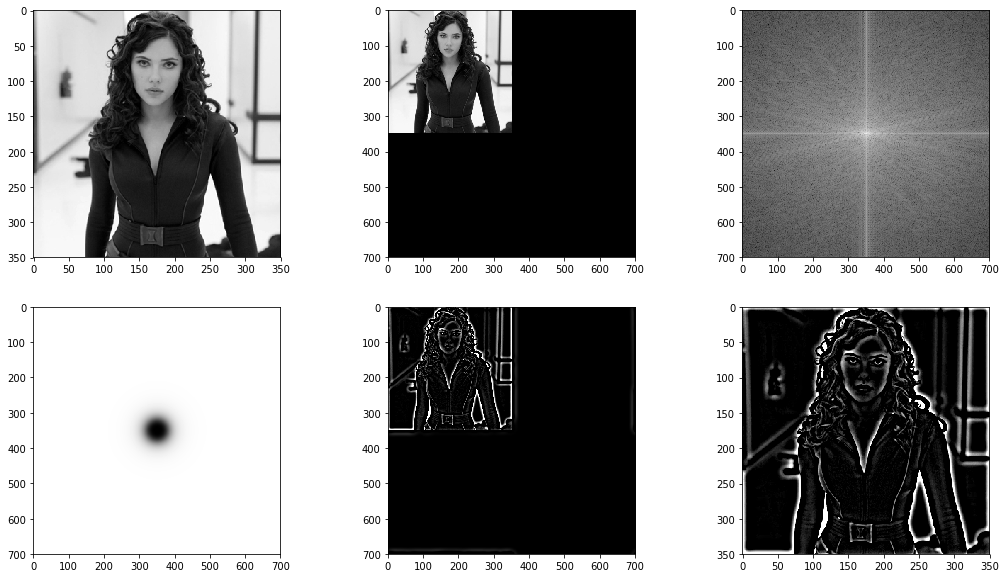

In [ ]:
#PASA ALTOS BUTTERWORTH


#### 7.3. Filtro pasaalto gaussiano

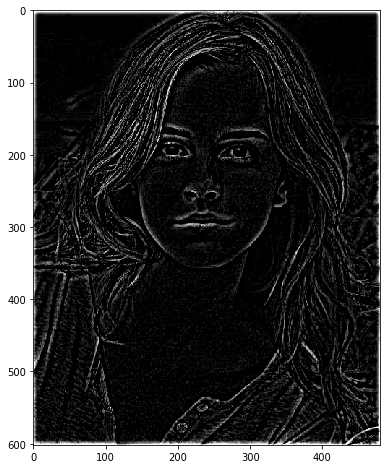

In [ ]:
img = cv2.imread('lab_images/emma.jpg', 0)
fil, col = img.shape

img_padded = np.pad(img,((0,fil),(0,col)),'constant',constant_values=((0, 0),(0,0)))

f, c = np.ogrid[0:2*fil,0:2*col]

D =  np.sqrt( (f-fil)**2 + (c-col)**2 )
D0 = (0.1*fil)
H_pa_gauss = 1 - np.exp(-(D**2)/(2*(D0**2)))

img_fft = np.fft.fft2(img_padded)
img_fft_shift = np.fft.fftshift(img_fft)

G_fft = img_fft_shift * H_pa_gauss

G_fft_ishift = np.fft.ifftshift(G_fft)
g = np.fft.ifft2(G_fft_ishift)
g_real = np.real(g)[0:fil, 0:col]

plt.figure(figsize=(8,8))
plt.imshow(g_real*5, cmap='gray', vmin=0, vmax=255)
plt.show()

```
Cree el algoritmo para mostrar en la misma figura el proceso de la aplicación del filtro gaussiano
```

```
Cada estudiante debe escribir una reflexión propia sobre el aprendizaje obtenido con la presenta guía
```

<nombre integrante 1>: En esta guía aprendí sobre.....









<nombre integrante 2>:









<nombre integrante 3>: 